# **1.5 Students with Poor Attendance**
# By student no: F216727

## Import the libraries 

In [9]:
import pandas as pd
import numpy as np
import sqlite3 
import matplotlib.pyplot as plt

## Functions

### Color code & format output

In [2]:
def color_code(att):
    """
    Setting background Colors 
    of table cells 
    value is a cell value. 
    """
    if att > 71.98 : # the value of the mean department 
        colour = 'limegreen'
    else:
        colour = ""
    styler=f'background-color: {colour}'
    return styler

def format_output(dfData):
    """
    applying formatting function to the dataframe.
    By using subset W1-W6 and change missing values to "No Attendance".
    """
    styledOutput=dfData.style.applymap(color_code, subset = ['W1','W2','W3','W4','W5','W6']).format('{:.1f}',na_rep = "No Attendance")
    
    return styledOutput

### All students average attendance (COA111 & COA122)

In [3]:
# create a function to display all student average attendance
def all_Stu_avg_att():

    sqlattcoa111 = """
        SELECT stucoa111.*, coa111sessions.week 
        FROM coa111sessions INNER JOIN stucoa111
        ON stucoa111.session_no = coa111sessions.session_no;
        """
    conn = sqlite3.connect('CWDatabase.db')
    stuAttcoa111 = pd.read_sql(sqlattcoa111,
                                con=conn,
                                index_col=["session_no"])
    stuAttcoa111 = stuAttcoa111

    sqlattcoa122 = """
        SELECT stucoa122.*, coa122sessions.week                    
        FROM coa122sessions INNER JOIN stucoa122
        ON stucoa122.session_no = coa122sessions.session_no;
        """
    conn = sqlite3.connect('CWDatabase.db')
    stuAttcoa122 = pd.read_sql(sqlattcoa122,
                                con=conn,
                                index_col=["session_no"])
    stuAttcoa122 = stuAttcoa122

    # using the concatenante and find the mean of students for each weeks
    weekatt = pd.concat([stuAttcoa111, stuAttcoa122]).groupby("week").mean(1).transpose() * 100 
    avgatt = weekatt.mean(1) # find the average attendance for each weeks
    weekatt["Average %"] = avgatt.values.round()
    weekatt = weekatt.sort_values(by = ['Average %'], ascending = False) # from the highest to the lowest average
    weekatt = weekatt.reset_index()
    weekatt = weekatt.set_index("index")
    weekatt.index.names = ["stu_id"]
    colorbelow_avg= format_output(weekatt)
    display(colorbelow_avg)
    
    return colorbelow_avg

### Top Ten Students for Poor Attendance (COA111 & COA122) 

In [4]:
def avg_att():

    sqlattcoa111 = """
        SELECT stucoa111.*, coa111sessions.week 
        FROM coa111sessions INNER JOIN stucoa111
        ON stucoa111.session_no = coa111sessions.session_no;
        """
    conn = sqlite3.connect('CWDatabase.db')
    stuAttcoa111 = pd.read_sql(sqlattcoa111,
                                con=conn,
                                index_col=["session_no"])
    stuAttcoa111 = stuAttcoa111

    sqlattcoa122 = """
        SELECT stucoa122.*, coa122sessions.week                
        FROM coa122sessions INNER JOIN stucoa122
        ON stucoa122.session_no = coa122sessions.session_no;
        """
    conn = sqlite3.connect('CWDatabase.db')
    stuAttcoa122 = pd.read_sql(sqlattcoa122,
                                con=conn,
                                index_col=["session_no"])
    stuAttcoa122 = stuAttcoa122

    # using the concatenante and find the mean of students for each weeks
    weekatt = pd.concat([stuAttcoa111, stuAttcoa122]).groupby("week").mean(1).transpose() * 100 
    avgatt = weekatt.mean(1) # find the average attendance for each weeks
    weekatt["Average %"] = avgatt.values.round()
    lowattTop10 = weekatt.sort_values(by = ['Average %']) # using sort_values to start from the lowest average
    lowattTop10 = lowattTop10.reset_index()
    lowattTop10 = lowattTop10.set_index("index")
    lowattTop10.index.names = ["stu_id"]
    lowattTop10 = pd.DataFrame(lowattTop10)

    lowattTop10 = lowattTop10.iloc[0:10] # select the 10 lowest student attendance
    lowattTop10 = lowattTop10.transpose()

    # color coded table for the students below the department average
    colorTop10below_avg = format_output(lowattTop10.T) 
    
    # finding the mean of the department
    deptavg = weekatt["Average %"].mean() 

    # department average
    deptavg = weekatt.mean().round() # finding the mean of department
    deptavg = pd.DataFrame(deptavg) 
    deptavg = deptavg.rename(columns = {0:"dept average"})
    deptavg = deptavg.drop(index = ['Average %'])

    # plot the graph to see the low student attendance
    ax = lowattTop10.plot(marker = "o", linestyle = 'None') 
    deptavg.plot(ax = ax, color = "red")
    plt.ylim([-10,100]) 
    plt.title("The Last Ten Students with Poor Attendance")
    plt.xlabel("week_no")
    plt.ylabel("Attendance %")
    plt.grid()
    pos = ax.get_position()
    ax.set_position([pos.x0, pos.y0,pos.width * 1.30, pos.height])
    ax.legend(loc = 'lower right', bbox_to_anchor =(1.25,0.15))
    plt.show()
 
    return colorTop10below_avg

## Main 1 (Last Ten Student with Poor Attendance)

In [5]:
def main_poor_att():
    poorstuAtt = avg_att()
    display(poorstuAtt)

### Testing 1 (The last ten students with poor attendance)

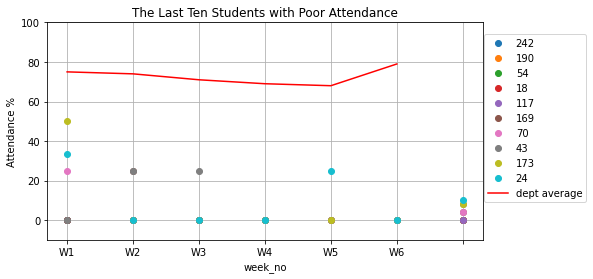

week,W1,W2,W3,W4,W5,W6,Average %
stu_id,,,,,,,
242,0.0,0.0,0.0,0.0,No Attendance,No Attendance,0.0
190,0.0,0.0,0.0,0.0,No Attendance,No Attendance,0.0
54,0.0,0.0,0.0,No Attendance,No Attendance,No Attendance,0.0
18,0.0,0.0,0.0,No Attendance,No Attendance,No Attendance,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.0,25.0,0.0,0.0,0.0,0.0,4.0
70,25.0,0.0,0.0,0.0,0.0,0.0,4.0
43,0.0,25.0,25.0,0.0,0.0,0.0,8.0
173,50.0,0.0,0.0,0.0,0.0,0.0,8.0


In [6]:
main_poor_att() 
# show a table and plot the graph 

## Main 2 (All students average attendance)

In [7]:
def main_all_stu_avg():
    allstuavg = all_Stu_avg_att()
    display(allstuavg)

### Test 2 (All students average attendance)

In [8]:
test = all_Stu_avg_att() 
# table of all student average attendance (coa111&122)

week,W1,W2,W3,W4,W5,W6,Average %
stu_id,,,,,,,
57,100.0,100.0,100.0,100.0,100.0,100.0,100.0
48,100.0,100.0,100.0,100.0,100.0,100.0,100.0
122,100.0,100.0,100.0,100.0,100.0,100.0,100.0
41,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0
221,100.0,100.0,100.0,100.0,100.0,100.0,100.0
106,No Attendance,No Attendance,100.0,100.0,100.0,100.0,100.0
228,100.0,100.0,100.0,100.0,100.0,100.0,100.0
15,100.0,100.0,100.0,80.0,100.0,100.0,97.0
